In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


### Loading Data

In [2]:
# import from sklearn datasets
# from sklearn.datasets import load_iris

# iris_data = load_iris()

# X = iris_data.data
# y = iris_data.target

In [3]:
# load from file

file_path = '../input/iris/Iris.csv'
iris_data = pd.read_csv(file_path, index_col='Id')

# iris_data.isnull().sum().sum() # = 0 missing values

In [4]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

target = ['Species']


labels_prefixed = iris_data.Species.unique()
labels = [str(i).removeprefix('Iris-') for i in labels_prefixed]
labels

['setosa', 'versicolor', 'virginica']

In [6]:
iris_setosa = iris_data[iris_data.Species == "Iris-setosa"]
iris_setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_versicolor = iris_data[iris_data.Species == "Iris-versicolor"]
iris_versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


In [8]:
iris_virginica = iris_data[iris_data.Species == "Iris-virginica"]
iris_virginica.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
101,6.3,3.3,6.0,2.5,Iris-virginica
102,5.8,2.7,5.1,1.9,Iris-virginica
103,7.1,3.0,5.9,2.1,Iris-virginica
104,6.3,2.9,5.6,1.8,Iris-virginica
105,6.5,3.0,5.8,2.2,Iris-virginica


### Apply Ordinal Encoding to Y

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() # Your code here
y = ordinal_encoder.fit_transform(iris_data[target])
iris_data.Species = y

iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0.0
2,4.9,3.0,1.4,0.2,0.0
3,4.7,3.2,1.3,0.2,0.0
4,4.6,3.1,1.5,0.2,0.0
5,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2.0
147,6.3,2.5,5.0,1.9,2.0
148,6.5,3.0,5.2,2.0,2.0


### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

y = iris_data.Species 

X = iris_data[features] # iris_data.drop(columns="Species")

# # Split into validation and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

# Fit Model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Plotting the Tree

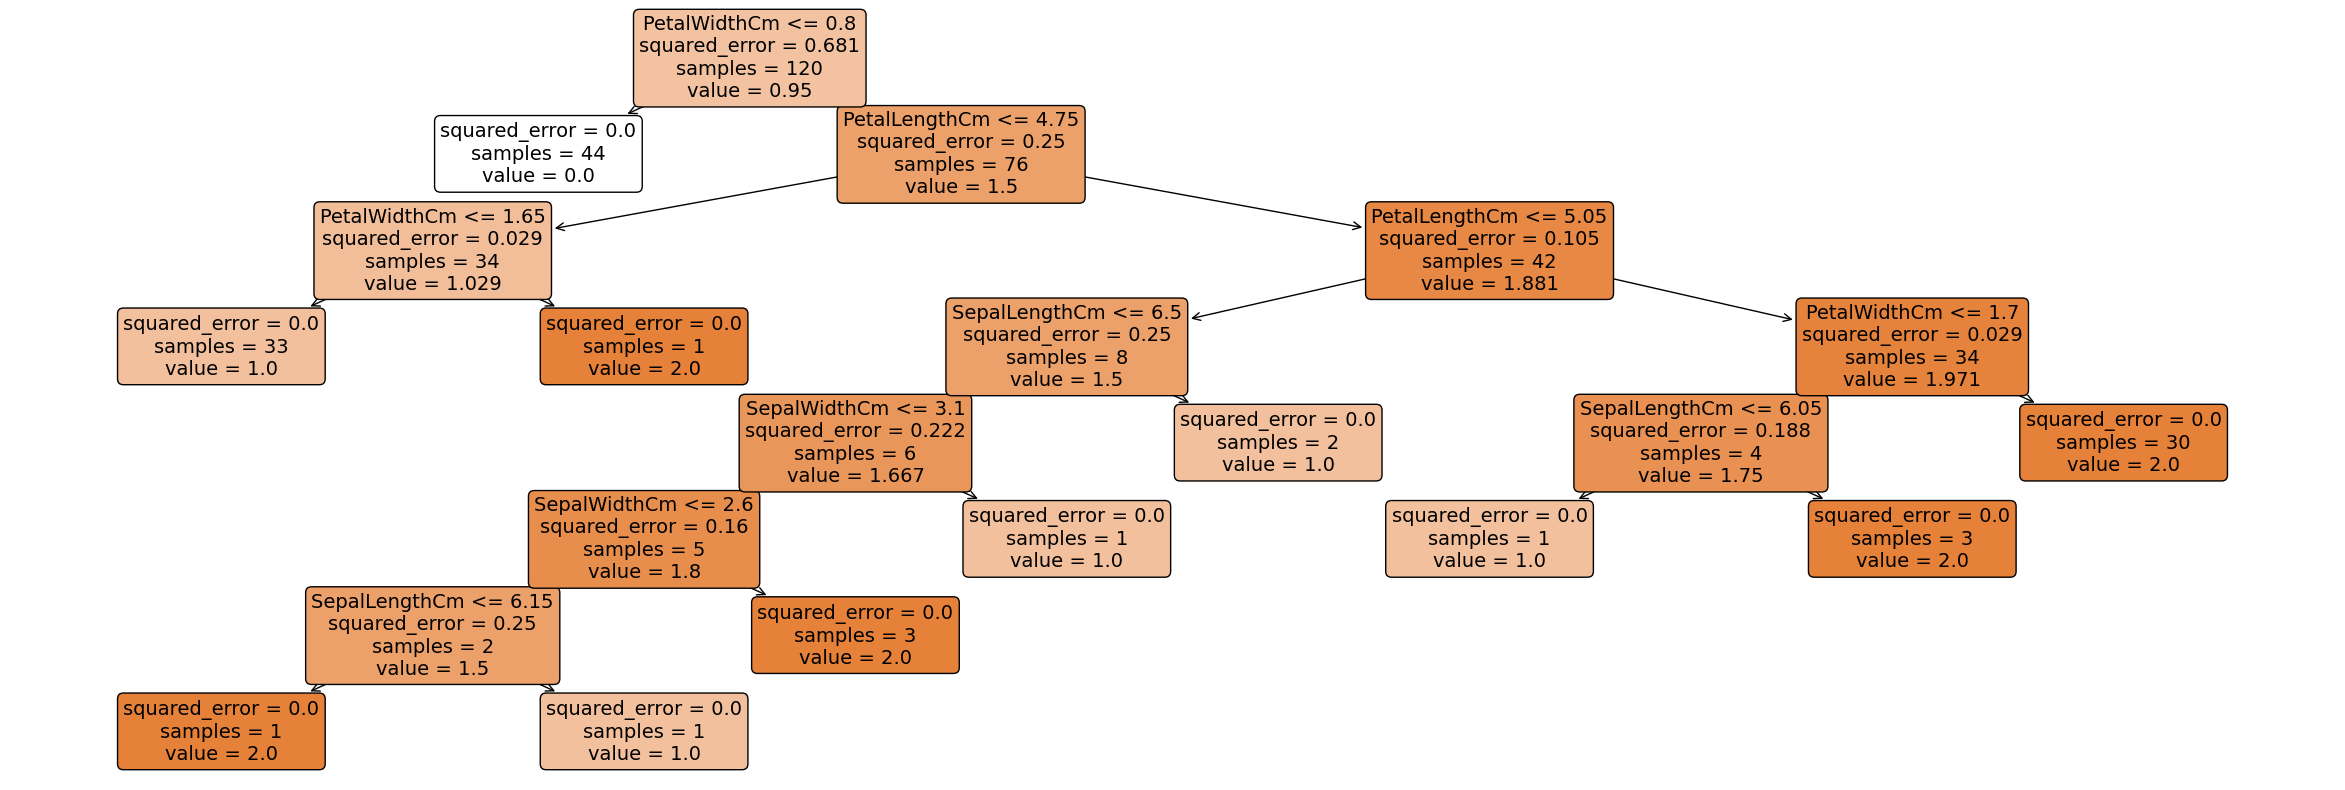

In [12]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
a = tree.plot_tree(model,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

### Predicting on Test Data

In [13]:
y_pred = model.predict(X_test)

### Evaluating Metrics

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[ 6  0  0]
 [ 0 12  0]
 [ 0  1 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state = 1)

# fit your model
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test).round()

In [16]:
# Evaluating the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)

Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## XGBoost

In [17]:
from xgboost import XGBRegressor

# Define the model
xg_model = XGBRegressor(random_state=0, n_estimators=200, learning_rate=0.05) # Your code here
xg_model.set_params(early_stopping_rounds=5)

# Fit the model
xg_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False) # Your code here

# Get predictions
xg_y_pred = xg_model.predict(X_test).round() # Your code here

In [18]:
# Evaluating the model
xg_accuracy = accuracy_score(y_test, xg_y_pred)
xg_conf_matrix = confusion_matrix(y_test, xg_y_pred)
xg_class_report = classification_report(y_test, xg_y_pred)

print("Accuracy:", xg_accuracy)
print("Confusion Matrix:\n", xg_conf_matrix)
print("Classification Report:\n", xg_class_report)

Accuracy: 1.0
Confusion Matrix:
 [[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Plotting Confusion Matrices

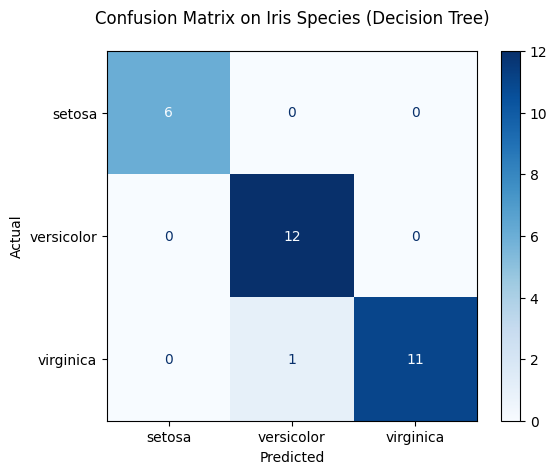

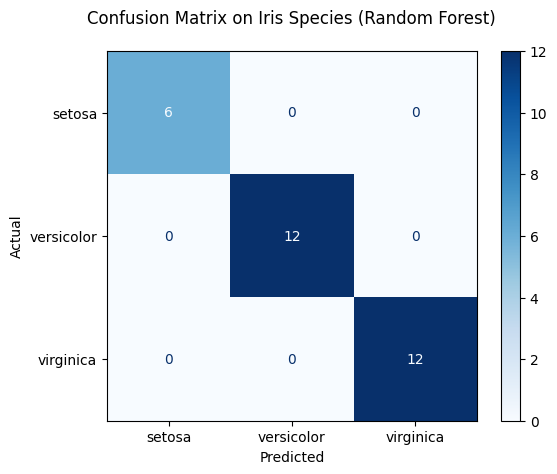

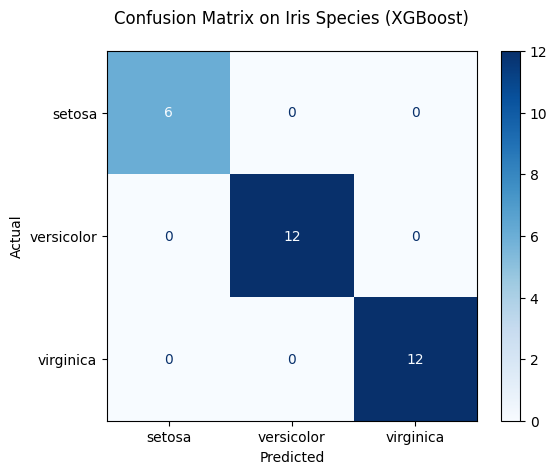

In [19]:
import matplotlib.pyplot as plt

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
cm_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.title('Confusion Matrix on Iris Species (Decision Tree)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix
rf_display = ConfusionMatrixDisplay(confusion_matrix = rf_conf_matrix, display_labels = labels)
rf_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.title('Confusion Matrix on Iris Species (Random Forest)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix
xg_display = ConfusionMatrixDisplay(confusion_matrix = xg_conf_matrix, display_labels = labels)
xg_display.plot(cmap=plt.cm.Blues,values_format='g')
plt.title('Confusion Matrix on Iris Species (XGBoost)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
